In [74]:
!pip install tensorflow-2.0


ERROR: Could not find a version that satisfies the requirement tensorflow-2.0 (from versions: none)
ERROR: No matching distribution found for tensorflow-2.0


In [75]:
!pip install --upgrade pip


Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.0.2)


In [76]:
!pip install tensorflow


In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [0]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [80]:
img = X_train[0]

print (img.shape())

TypeError: ignored

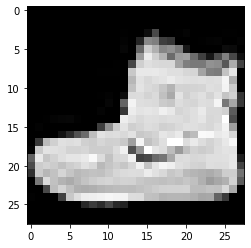

In [84]:
import matplotlib.pyplot as plt


plt.imshow(X_train[0], cmap="gray")

Convert the training and test data in range 0-255. Step called "Normalizing"

In [0]:
X_train = X_train/255.0
X_test = X_test/255.0

In [0]:
model = tf.keras.models.Sequential()

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get("acc")>0.95):
      print ("Reached 60% accuracy, cancelling training!\n")
      self.model.stop_training = True

In [0]:
callBacks = myCallback()

# Flatten the input layer as a 1 Dimensional array
model.add(tf.keras.layers.Flatten())

# Add a layer of Dense layer with 128, neurons, this values can be changed to 512, etc with activation function as ReLU.
model.add(tf.keras.layers.Dense(1024, activation=tf.nn.relu))

#Finally add a final layer with 10 neurons, with activation as softmax
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])


In [89]:
model.fit(X_train, Y_train, epochs=50, callbacks=[callBacks])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 217us/sample - loss: 0.4668 - acc: 0.8331
Epoch 2/10
60000/60000 [==============================] - 13s 217us/sample - loss: 0.3569 - acc: 0.8695
Epoch 3/10
60000/60000 [==============================] - 13s 221us/sample - loss: 0.3205 - acc: 0.8817
Epoch 4/10
60000/60000 [==============================] - 13s 216us/sample - loss: 0.2971 - acc: 0.8899
Epoch 5/10
60000/60000 [==============================] - 13s 214us/sample - loss: 0.2801 - acc: 0.8952
Epoch 6/10
60000/60000 [==============================] - 13s 219us/sample - loss: 0.2633 - acc: 0.9029
Epoch 7/10
60000/60000 [==============================] - 13s 211us/sample - loss: 0.2521 - acc: 0.9057
Epoch 8/10
60000/60000 [==============================] - 13s 213us/sample - loss: 0.2395 - acc: 0.9104
Epoch 9/10
60000/60000 [==============================] - 13s 214us/sample - loss: 0.2299 - acc: 0.9145
Epoch 10/10
60000/60000 [================

In [0]:
model.evaluate(X_test, Y_test)

In [0]:
classification = model.predict(X_test)

In [0]:
print (classification[3])

In [0]:
print (Y_test[3])